# Implementing the Gradient Descent Algorithm

In this lab, we'll implement the basic functions of the Gradient Descent algorithm to find the boundary in a small dataset. First, we'll start with some functions that will help us plot and visualize the data.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

#Some helper functions for plotting and drawing lines

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

## Reading and plotting the data

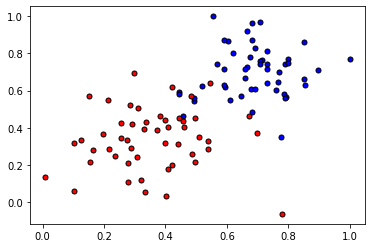

          0         1  2
0   0.78051 -0.063669  1
1   0.28774  0.291390  1
2   0.40714  0.178780  1
3   0.29230  0.421700  1
4   0.50922  0.352560  1
..      ...       ... ..
95  0.77029  0.701400  0
96  0.73156  0.717820  0
97  0.44556  0.579910  0
98  0.85275  0.859870  0
99  0.51912  0.623590  0

[100 rows x 3 columns]


In [ ]:
data = pd.read_csv('data.csv', header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()
#print(data)

## TODO: Implementing the basic functions
Here is your turn to shine. Implement the following formulas, as explained in the text.
- Sigmoid activation function

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

- Output (prediction) formula

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

- Error function

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

- The function that updates the weights

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \longrightarrow b + \alpha (y - \hat{y})$$

In [ ]:
# Implement the following functions

# Activation (sigmoid) function
def sigmoid(x):
  activation = 1/(1+math.e**(-x))
  return activation

# Output (prediction) formula
def output_formula(features, weights, bias):
    y = sigmoid(np.sum(np.multiply(weights,features))+bias)
    return y

# Error (log-loss) formula
def error_formula(y, output):
    error = -np.multiply(y,np.log(output))-np.multiply((np.ones(len(y))-y),np.log(np.ones(len(y))-output))
    return error
# Gradient descent step
def update_weights(x, y, weights, bias, learnrate):
    weights += learnrate*(y-output_formula(x, weights, bias))*x
    bias += learnrate*(y-output_formula(x, weights, bias))
    return weights, bias

## Training function
This function will help us iterate the gradient descent algorithm through all the data, for a number of epochs. It will also plot the data, and some of the boundary lines obtained as we run the algorithm.

In [ ]:
np.random.seed(44)


#try to change the following two values to increase the accuracy
epochs = 200
learnrate = 0.005

def train(features, targets, epochs, learnrate, graph_lines=False):
    
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        o=np.zeros(len(features))
        i=0
        for x, y in zip(features, targets):
            weights, bias = update_weights(x,y,weights,bias,learnrate)       #update the weights
            o[i]=output_formula(x,weights,bias)
            i=i+1
        
        # Printing out the log-loss error on the training set
        out = o     # calculate the predicted values
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            
            # Converting the output (float) to boolean as it is a binary classification
            # e.g. 0.95 --> True (= 1), 0.31 --> False (= 0)
            predictions = out > 0.5
            
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()

## Time to train the algorithm!
When we run the function, we'll obtain the following:
- 10 updates with the current training loss and accuracy
- A plot of the data and some of the boundary lines obtained. The final one is in black. Notice how the lines get closer and closer to the best fit, as we go through more epochs.
- A plot of the error function. Notice how it decreases as we go through more epochs.


========== Epoch 0 ==========
Train loss:  0.7311064131843608
Accuracy:  0.45

========== Epoch 20 ==========
Train loss:  0.6232979668587588
Accuracy:  0.68

========== Epoch 40 ==========
Train loss:  0.5550613747982771
Accuracy:  0.85

========== Epoch 60 ==========
Train loss:  0.5015860770955625
Accuracy:  0.89

========== Epoch 80 ==========
Train loss:  0.4592020484560784
Accuracy:  0.92

========== Epoch 100 ==========
Train loss:  0.42506550314497316
Accuracy:  0.94

========== Epoch 120 ==========
Train loss:  0.39712745832894564
Accuracy:  0.95

========== Epoch 140 ==========
Train loss:  0.37391614485918034
Accuracy:  0.94

========== Epoch 160 ==========
Train loss:  0.3543659690101402
Accuracy:  0.94

========== Epoch 180 ==========
Train loss:  0.3376956428494647
Accuracy:  0.94


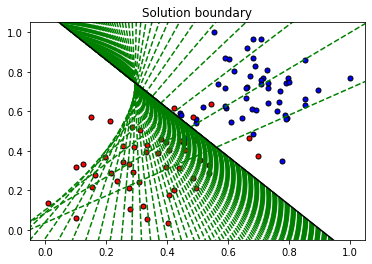

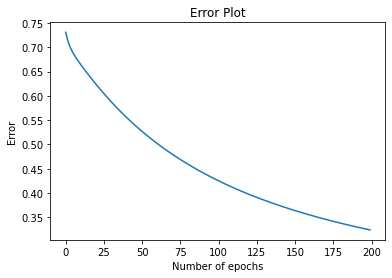

In [ ]:
train(X, y, epochs, learnrate, True)